# Лабораторная работа. Рекомендательные системы.



Сдавать ноутбук не нужно, все задания сдаются в системе Яндекс Контест.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 13 баллов. Сдавать задание после указанного в контесте срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).




Testing started at 18:41 ...
Connected to pydev debugger (build 241.14494.240)
Launching pytest## Знакомство с данными

### Рекомендация организаций, которые получат высокий отзыв от пользователя, когда он гостит в чужом для себя городе

Данные подготовлены по аналогии с конкурсом https://yandex.ru/cup/ml/.
Выражаем благодарность Сураджу Сингху за помощь в подготовке данных.


Легенда исходного соревнования:

Иннокентий — москвич в пятом поколении. 

Блуждание между тремя тополями на Плющихе, ежемесячное посещение Мавзолея, кормление тапиров в Московском зоопарке — всё это в крови Иннокентия.

Помимо этого, Иннокентий очень любит поесть. Как типичный среднестатистический москвич, Иннокентий посещает исключительно рестораны со средним чеком от 5000 рублей, любит устрицы и хорошие стейки зернового откорма, избегает кафе с шаурмой — боится, что его нечаянно накормят шавермой. Будучи добропорядочным горожанином, Иннокентий исправно оставляет на *Яндекс.Картах* отзывы на посещенные рестораны, живописно описывая свой гастрономический опыт.

Однажды Иннокентий понимает, что за пределами МКАД лежит целый мир, дикий и неизведанный. Он решается на самое опасное и рискованное путешествие в своей жизни — посещение Санкт-Петербурга. Иннокентий выбрал поезд на *Яндекс.Расписаниях*, забронировал отель на *Яндекс.Путешествиях* и отправился в путь.

Выйдя утром из вагона поезда «Красная Стрела», Иннокентий опасливо огляделся и решил хорошо подкрепиться. Дело за малым — подобрать хороший ресторан, удовлетворяющий его утонченным вкусам. Рекомендации друзей оказались бесполезны, ведь все они москвичи и плохо разбираются в петербургских гастрономических трендах. Давайте поможем Иннокентию найти вкусную еду.

В этой задаче вам предстоит построить рекомендательную систему, которая предложит пользователям *Яндекс.Карт* соответствующие их вкусу кафе, бары и рестораны в неродном городе: москвичам — в Санкт-Петербурге, а петербуржцам — в Москве. 

В качестве данных используйте анонимизированную информацию о реальных отзывах и оценках, оставляемых пользователями Яндекс.Карт на заведения общепита Москвы и Санкт-Петербурга, и различную информацию о самих заведениях. 

В частности, каждый отзыв содержит множество аспектов (упомянутые в отзыве блюда, особенности и т. п.), извлеченных из отзыва с помощью NLP-алгоритма. Для заданного множества москвичей и петербуржцев нужно предсказать, какие заведения в неродном городе они посетят, оставив при этом положительный отзыв с оценкой 4 или 5.


Архив с данными можно найти [здесь](https://disk.yandex.ru/d/9yMyAhVNw_tvLA).




Обучающее множество собрано за X = 1277 дней, тестовое множество – за последующие Y = 107 дней.

**reviews.csv**

В этом файле дана информация об отзывах и оценках, оставленных некоторым множеством жителей Москвы и Санкт-Петерубрга в течение обучающего периода: 


```
user_id,org_id,ts,rating,aspect_ids
18a7276b,14e1b7bb,120,4,2 4 23
...
```

* user_id: идентификатор пользователя
* org_id: идентификатор организации
* ts: время отзыва (в днях от начала обучающего периода)
* rating: поставленная оценка
* aspect_ids: набор упомянутых в тексте отзыва аспектов.

**organisations.csv**

Информация об организациях:

```
org_id,city,average_bill,rubric_id,avg_rating,feature_ids
14e1b7bb,msk,2000,6,4.3,3 5 14 28
0ed69bff,spb,1500,2,4.8,2 5 6
...
```

* org_id: идентификатор организации
* city_id: город организации
* average_bill: средний чек в рублях (округленный с точностью до 500 рублей)
* avg_rating: средний рейтинг (в том числе с учетом не перечисленных в файле reviews.csv отзывов и оценок)
* rubric_id: рубрика опрганизации
* feature_ids: набор известных особенностей данной организации.

**users.csv**

Информация о городе проживания пользователя:

```
user_id,city
18a7276b,msk
270cc9fee,spb
4bf7ffc,msk
...
```

**aspects.csv**

Описание извлекаемых из отзывов аспектов. Множество аспектов извлекается из отзыва с помощью NLP-алгоритма и может быть неточным.

```
aspect_id,aspect_name
1,Бургеры
2,Кофе
3,Интерьер
4,Веранда
5,Устрицы
...
```

**features.csv**

Описание особенностей организаций. Как правило, множество особенностей организации заполняется ее владельцем и может быть неточным.

```
feature_id,feature_name
1,Wi-Fi
2,Доставка
3,Кофе с собой
...
```

**rubrics.csv**

Описание рубрик организаций:

```
rubric_id,rubric_name
1,Ресторан
2,Кафе
3,Бар
...
```

**test_users.csv**

Множество пользователей, для которых необходимо сделать предсказание:

```
user_id
270cc9fee
4bf7ffc
...
```

**Задание 1.** Знакомство с данными.

В первую очередь нам понадобятся данные по __пользователям__ (в терминах recsys -- usesr), __организациям__ (в терминах recsys -- items) и сами __отзывы__ (в терминах recsys -- ratings или explicit feedback). 

На основании этих данных можно будет проводить базовый анализ методами колаборативной фильтрации.

  * Опишите, насколько активно пользователи оставляют отзывы, насколько активно организации получают отзывы.
  * Предложите стратегии фильтрации данных.
  


Во вторую очередь нас будут инетересовать атрибуты организаций: aspects, features, rubrics.
Проанализируйте эти таблицы. Какие признаки для описания организаций и пользователей из них можно извлечь?


In [8]:
from src.data_loading import load_data

data = load_data('data')

In [9]:
data

Data(reviews=         user_id  org_id  rating    ts aspects
0         593294   47111     1.0   279     NaN
1         358636   47111     1.0   391     NaN
2         527308   47111     1.0   419     NaN
3         412917   47111     1.0   641     NaN
4         643047   47111     1.0   654     NaN
...          ...     ...     ...   ...     ...
4129691  1108965   19492     4.0   982      97
4129692   953612   19492     5.0   448      97
4129693   672451   44170     2.0  1127      97
4129694  1334548   20269     5.0  1001      97
4129695   987005    6951     5.0   657      97

[4129696 rows x 5 columns], users=         user_id city
0              0  msk
1              1  msk
2              2  msk
3              3  msk
4              4  msk
...          ...  ...
1393003  1393003  msk
1393004  1393004  msk
1393005  1393005  msk
1393006  1393006  msk
1393007  1393007  msk

[1393008 rows x 2 columns], organisations=       org_id city  average_bill    rating   rubrics_id  \
0           0  msk    

**Задание 2.** Организация валидации.

В оригинальном соревновании, обучающее множество было собрано за X = 1277 дней, тестовое множество – за последующие Y = 107 дней.

используем валидацию со скользящим окном 

**N.B.** У нас не получится честно сэмулировать колонку aspect_ids, т.к. для этого потребуется доступ к сырым данным, котрых у нас не будет в данной лабораторной работе. Будет ли это являться большим ликом -- факультативный вопрос, который мы оставим за скобками лабораторной.

In [10]:
from matplotlib import pyplot as plt
from src.cross_val import DaysTimeSeriesSplit
import numpy as np

/tmp/ipykernel_165876/3771338722.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


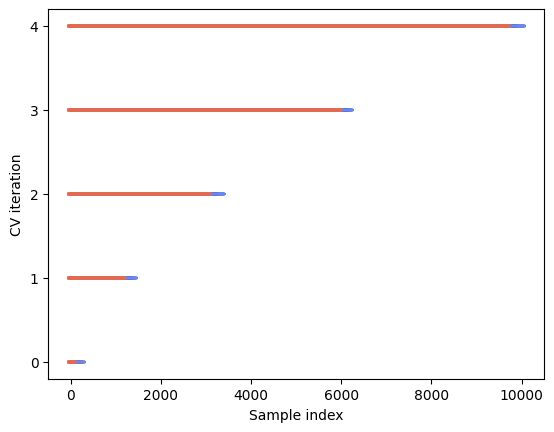

In [11]:


cv_splitter = DaysTimeSeriesSplit(n_splits=5, test_size_in_days=10, min_train_size_in_days=100)

fig, ax = plt.subplots()
for num_split, (train_indices, test_indices) in enumerate(cv_splitter.split(X=data.reviews[['user_id', 'org_id', 'ts']].sample(10000).sort_values(by='ts').reset_index(drop=True), y=None)):
    indices = np.array([np.nan] * 10000)
    indices[train_indices] = 1
    indices[test_indices] = 0

    # Visualize the results
    ax.scatter(
        range(len(indices)),
        [num_split + 0.5] * len(indices),
        c=indices,
        marker="_",
        cmap=plt.cm.coolwarm,
        vmin=-0.2,
        vmax=1.2,
    )
    
    yticklabels = list(range(5))
    ax.set(
        yticks=np.arange(5) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
    )
    
fig.show();

**Задание 3.** Базовые решения.

Сделаем базовые решения:
  * Для каждого пользователя выдаём 20 случайных организаций
  * Для каждого пользователя выдаём самые популярные организации в неродном городе

**Задание 4.** Метрики качества.

Напомним, что у нас бинарная релевантнотсь на основе оценки вычисляется как предикат **оценка больше, чем 3**.

Реализуйте набор метрик качества (можете оборачивать внешние паекты):
   * MNAP@20 (как в описании соревнования)
   * HitRate ( = 1, если среди рекомендаций есть хотя бы одна релевантная и 0 иначе)
   * MRR@20 ( обратная позиция первой релевантной рекомендации из списка рекомендаций длины K. )
   * Coverage (доля item-ов, учитываемых в рекомендациях)
   * Surprisal(см. ниже) 


### Surprisal
Посмотирм, насколько наши рекомендации хороши с точки зрения новизны для пользователя, в качестве новизны будем рассматривать "непопулярность" айтемов в рекомендациях.

Будем рассматривать собственную информацию item-а как меру его новизны.

$$selfInformation(i) = -\log_2 \frac{|u_i|}{|N|}$$, 
где 
$i$ - объект, $|N|$ - число взаимодействий в обучающей выборке,  $|u_i|$ - число пользователей, взаимодействовавших с объектом в обучающей выборке.

После подсчета собственной информации усредним значения собственной информации в рекомендациях пользователя.

Чтобы получить значения от 0 до 1, разделим значение метрики для пользователя на максимально возможно значение метрики равное $log_2 N$.

$$ Surprisal(u)@k = \frac{1}{k \cdot log_2 N} \sum_{j = 1}^{k}selfInformation(i_{u,j}) $$

где $i_{u,j}$ это j-й объект, который мы порекомендововали пользователю.

Получившаяся метрика похожа на энтропию Шеннона:
$$H = - K \sum_{i\in R}{p_i log p_i}$$


Результа усредним по пользователям.

### Что нужно сделать
    
  * Создайте функцию, которая генерирует словарь с метриками, по предоставленному решению.

  * Оцените baseline-решения на валидации.

In [14]:
from src.scoring import Scorer

scorer = Scorer(k=20, cv_splitter=cv_splitter, data=data)

from src.models.based import RandomRecommender
from src.transforms import UserInfoJoiner, OrgInfoJoiner
from sklearn.pipeline import make_pipeline

random_recommender_pipeline = make_pipeline(
    UserInfoJoiner(user_info=data.users),
    OrgInfoJoiner(org_info=data.organisations),
    RandomRecommender(organisations_and_cities=data.organisations[['org_id', 'city']], n_items=20, random_state=42)
)

scorer.score(random_recommender_pipeline, 'random recommender')

# Do for Popular Recommender as well
from src.models.statistics_based import PopularityRecommender

from IPython.display import display
display(scorer.leaderboard())

,name,model,mnap_mean,mnap_std,hit_rate_mean,hit_rate_std,mrr_mean,mrr_std,coverage_mean,coverage_std,surprisal_mean,surprisal_std
0,random recommender,"Pipeline(steps=[('userinfojoiner', UserInfoJoi...",NaN,NaN,0.001109,0.000919,0.00008,0.00006,0.92565,0.108264,16.56959,1.569597


**Задание 5.** Метод Memory based. User-2-User or Item-2-Item

Теперь рассмотрим [memory-based](https://en.wikipedia.org/wiki/Collaborative_filtering#Memory-based) методы рекоммендаций.
Подход, лежащий в их основе, использует данные о рейтингах для вычисления сходства между пользователями (user-based) или объектами (item-based), на основе этих данных делаются предсказания рейтингов и, в дальнейшем, строятся рекоммендации. Эти методы просты в реализации и эффективны на ранних стадиях разработки рекомендательных систем.
                                 
              
За последние годы было создано много библиотек для реализации алгоримтов построения рекомендаций.      
  * https://github.com/benfred/implicit
  * https://sberbank-ai-lab.github.io/RePlay/index.html
  * https://github.com/apple/turicreate 
  * https://github.com/caserec/CaseRecommender

попробуйте также их для нашей задачи, адаптируйте интерфейс под `Scorer`

Если обучение идёт слишком долго подумайте про разреженные матрицы 



In [13]:
from src.models.memory_based import UserBasedRecommender, ItemBasedRecommender

scorer.score(...)

AttributeError: 'ellipsis' object has no attribute 'fit'

## Методы Matrix factorization

**Задание 6.**

- Разложите матрицу рейтингов с помощью [разреженного SVD](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) и, восстановив ее, получите предсказания рейтингов для всех пар пользователь-объект. В данном случае неизвестные рейтинги заполняются нулями, а затем восстанавливаются с помощью SVD (этот метод называется PureSVD).
   * Получив векторные представления пользователей и объектов и сингулярные числа, мы можеи восстановив матрицу и в местах нулей получим "предсказанные значения вероятностей" для новых объектов.
- Рассмотрите, как минимум, 5 различных значений ранга разложения. Оцените качество рекомендаций

In [ ]:
from src.models.matrix_factorization_based import SVDRecommender

scorer.score(...)

# ALS
Довольно популярным базовым методом в рекомендательных системах является ALS.

### Explicit ALS

Релевантность:
$$r_{ui} = q_i^T p_u$$

Loss:
$$\min_{p*, q*} \sum_{(u, i \in \mathcal{K})} (r_{ui} - q_i^T p_u)^2 + \lambda(\|{q_i}\|^2 + \|{p_i}\|^2)$$

### [Implicit ALS](http://yifanhu.net/PUB/cf.pdf)

Релевантность:
$$r_{ui} = q_i^T p_u$$

Loss:
$$\min_{p*, q*} \sum_{(u, i \in \mathcal{K})} c_{ui}(p_{ui} - q_i^T p_u)^2 + \lambda(\|{q_i}\|^2 + \|{p_i}\|^2)$$
Где $c_{ui}$ - значение в матрице implicit feedback, а $p_{ui}$ равно 1, если пользователь u взаимодействовал с item-ом i, и 0 иначе.

### Усложнения ALS
Обучив для каждого пользователя и объекта свой bias и добавив регуляризацию можно улучшить качество решения. Подробнее о различных матричных разложениях для задачи рекомендаций можно почитать [в статье на Хабре](https://habr.com/ru/post/486802/).

В рейтинг объекта для пользователя, например, может быть представлен:
$$r_{ui} = \mu + b_i + b_u + q_i^T p_u$$

А функция потерь будет выглядеть так:
$$\min_{b*, p*, q*} \sum_{(u, i \in \mathcal{K})} (r_{ui} - \mu - b_i - b_u - q_i^T p_u)^2 + \lambda(\|{q_i}\|^2 + \|{p_i}\|^2 + b_i^2 + b_u^2)$$

Матричная факторизация - хороший подход, который позволяет получить рекомендации для теплых пользователей, а также находить похожих пользователей и объекты, посчитав расстояния между векторами. Обучив модель и получив вектора можно перейти от задачи рекомендаций к задаче поиска ближайших соседей и использовать ANN-методы.

**Задание 7.**
Примените ALS.

попробуйте также реализацией из бибилотеки https://github.com/benfred/implicit, 
адаптируйте интерфейс под `Scorer`

Попробуйте использовать как все оценки, так и только высокие. Есть ли разница?

In [ ]:
from src.models.matrix_factorization_based import ALSRecommender

scorer.score(...)

**Задание 8.**

На [семинаре](https://github.com/monkey0head/recsys_sem) Вам было расказано про бибилиотеку LightFM.
Примените ее для нашей задачи. Используя фичи и не используя фичи, сравните результат.

**Задание 9.**

   Посмотрим на все прошлые методы как на модели, которые генерируют нам кандидатов для ответа рекомендательной системы. 
   
   Как нам выбрать те 20 организаций наилучшим образом? 
   
   Давайте подключим машинное обучение. Сформуллируем задачу ранжирования: запросом будет пользователь. Документами будут организации. Наивным призаковым описанием будет, например, факт рекомендации данной органицзаии или скор/ранг от моделей SVD, ALS, LightFM.
   Примените catboost/xgboost/lightgbm для создания переранжирования рекомендаций. То есть сделаем двухуровневую модель. Выясните, наиболее важные признаки моделей перевого уровня.